In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/paramitadas1/Predict-goal-or-miss--Chritiano-Ronaldo/main/train.csv")
df.head(5).T

,0,1,2,3,4
is_goal,0,0,1,0,0
match_event_id,NaN,505.0,309.0,106.0,284.0
location_x,-49.0,-59.0,0.0,6.0,-120.0
location_y,NaN,191.0,0.0,242.0,82.0
remaining_min,7.0,1.0,2.0,0.0,9.0
power_of_shot1,3.0,4.0,3.0,1.0,3.0
knockout_match2,0.0,0.0,NaN,1.0,1.0
game_season,2014-15,2002-03,1997-98,2007-08,2003-04
remaining_sec1,14.0,9.0,58.0,21.0,36.0
distance_of_shot1,39.0,39.0,20.0,44.0,34.0


In [5]:
# Saving csv File into local system for further use
#df.to_csv("Dataset/Predict_goalormiss_Chritiano-Ronaldo.csv")

In [8]:
df.shape

(20764, 27)

# Understanding the missing data

In [3]:
df.isnull().sum()

is_goal                      0
match_event_id            1044
location_x                 954
location_y                1042
remaining_min             1043
power_of_shot1             240
knockout_match2            266
game_season               3919
remaining_sec1             213
distance_of_shot1         1069
area_of_shot              1011
shot_basics               1098
range_of_shot             1084
team_name                 1031
date_of_game              1041
home_away                 1019
shot_id_number            1049
lat_lng                   1068
type_of_shot                 0
type_of_combined_shot    10454
match_id                     0
team_id                      0
remaining_min.1           1051
power_of_shot             1028
knockout_match1           1034
remaining_sec2            1033
distance_of_shot2         1050
dtype: int64

In [4]:
# Calculating the missing data percentage
missing_df = pd.DataFrame((df.isnull().sum()/len(df)*100).round(1), columns=[ "%age_of_Null_value"])

In [28]:
missing_df

,%age_of_Null_value
is_goal,0.0
match_event_id,5.0
location_x,4.6
location_y,5.0
remaining_min,5.0
power_of_shot1,1.2
knockout_match2,1.3
game_season,18.9
remaining_sec1,1.0
distance_of_shot1,5.1


In [20]:
# number of missinging value more then 5%
missinf_df[missing_df["%age_of_Null_value"]>=6]

,%age_of_Null_value
game_season,18.9
type_of_combined_shot,50.3


### Tabular Report

In [30]:
missing_df["Missing_val"] = df.isnull().sum()

In [38]:
missing_df.sort_values("%age_of_Null_value",inplace=True)

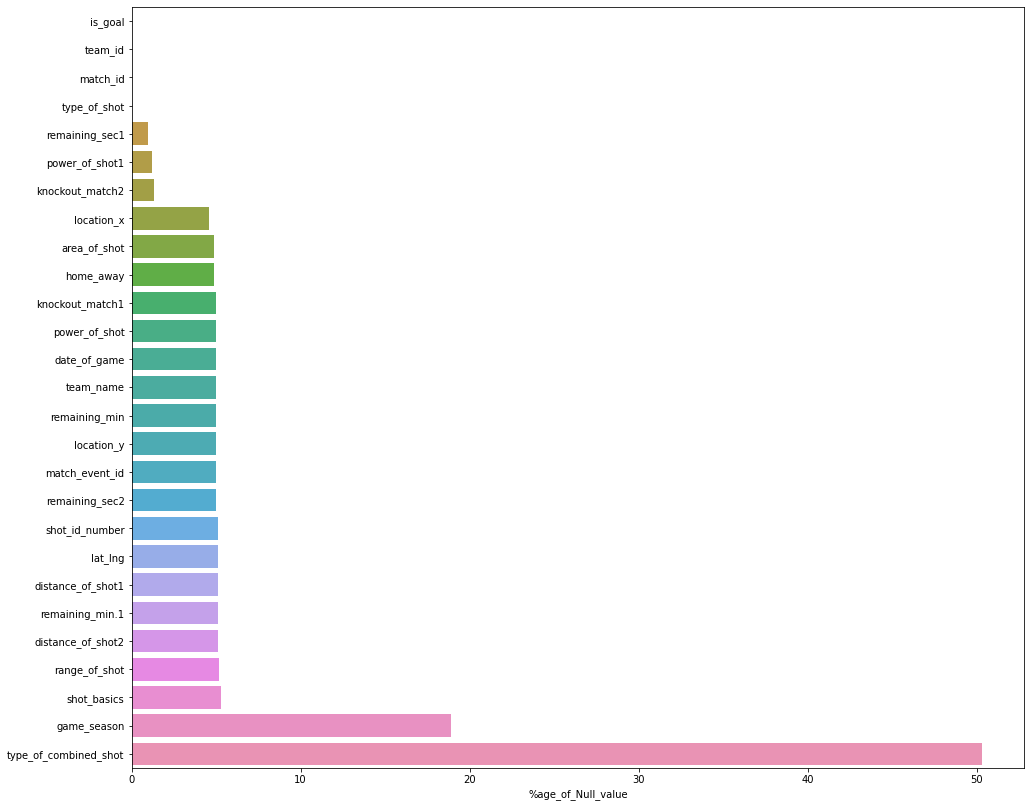

In [40]:
#Plotting the missing data
plt.figure(figsize=(16,14))
sns.barplot(data = missing_df, x="%age_of_Null_value", y=missing_df.index);
#plt.savefig("Dataset/missing.png")

# Row wise missing

In [57]:
missing_row = pd.DataFrame(df.isnull().sum(axis=1).value_counts(), columns=["missing_sparcity"])
missing_row.reset_index(inplace=True)
missing_row

,index,missing_sparcity
0,1,7000
1,2,6119
2,0,3337
3,3,3006
4,4,985
5,5,260
6,6,54
7,7,3


In [58]:
missing_row["no.of feature"] = df.shape[1]
missing_row.columns = ["each row missing value", "missing_sparcity", "no. of features"]


In [59]:
missing_row = missing_row[["no. of features","each row missing value", "missing_sparcity"]]
missing_row

,no. of features,each row missing value,missing_sparcity
0,27,1,7000
1,27,2,6119
2,27,0,3337
3,27,3,3006
4,27,4,985
5,27,5,260
6,27,6,54
7,27,7,3


<AxesSubplot:>

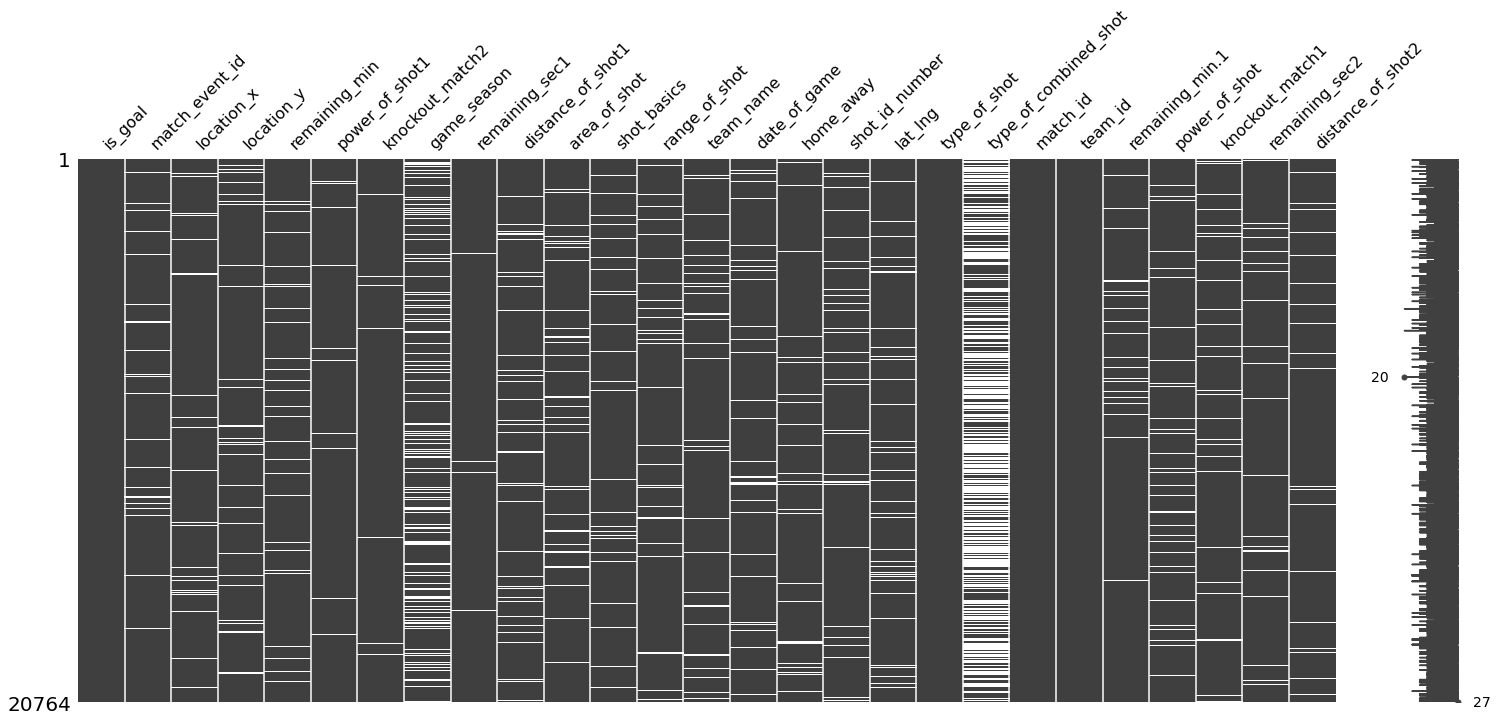

In [60]:
# using missingno library
import missingno as mis
mis.matrix(df)